In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection & Analysis

In [3]:
df = pd.read_csv(r"C:\Users\shalo\Downloads\archive\Mall_Customers.csv")

In [4]:
df.rename({'Genre': 'Gender'}, axis=1, inplace=True)

In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data exploration and visualization

<Figure size 1600x1000 with 0 Axes>

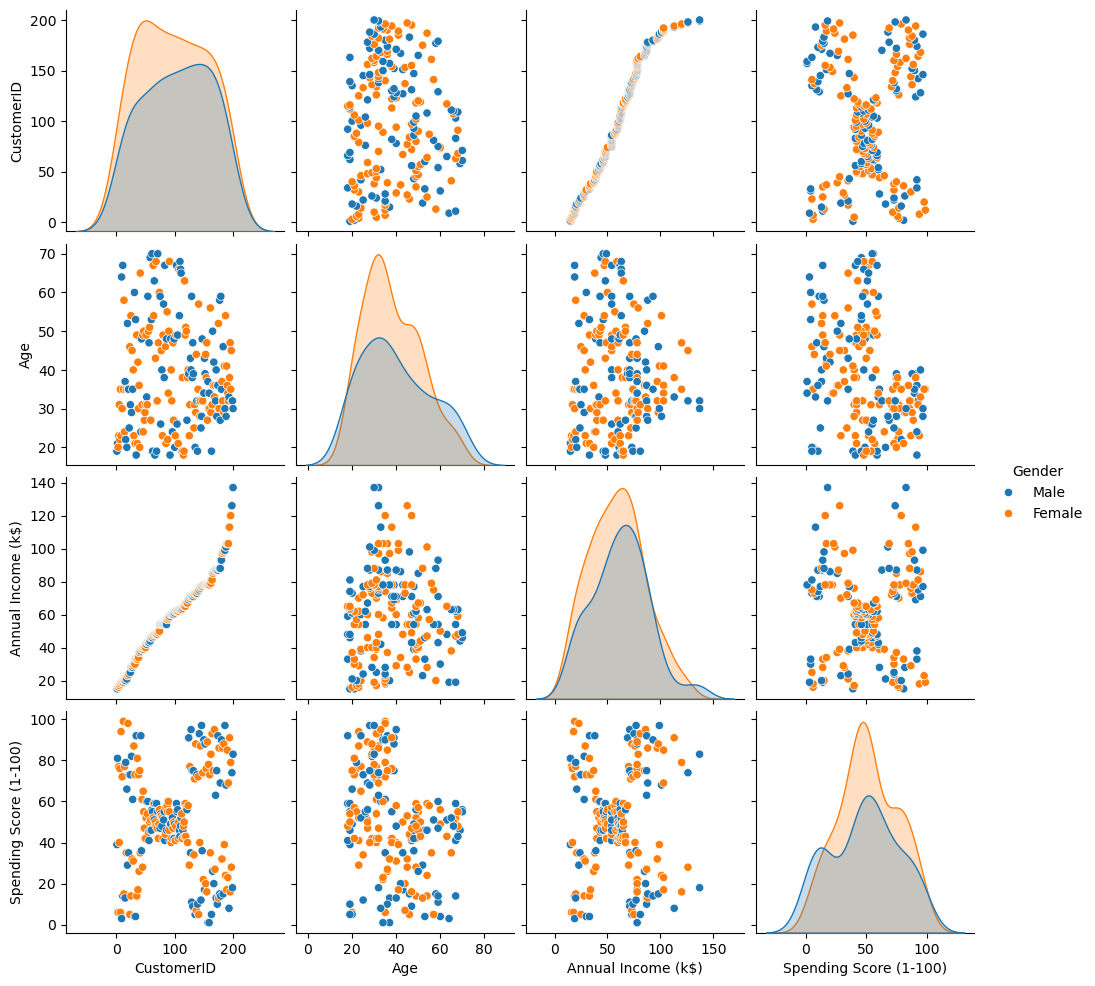

In [11]:
plt.figure(1,figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

Number of male vs female

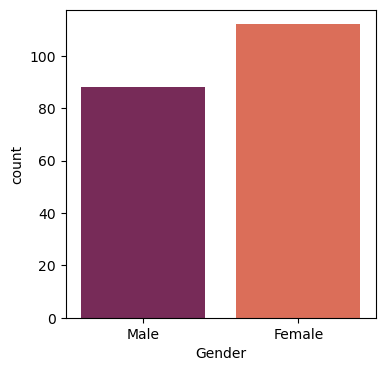

In [12]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df, hue = 'Gender' , palette = "rocket")
plt.show()

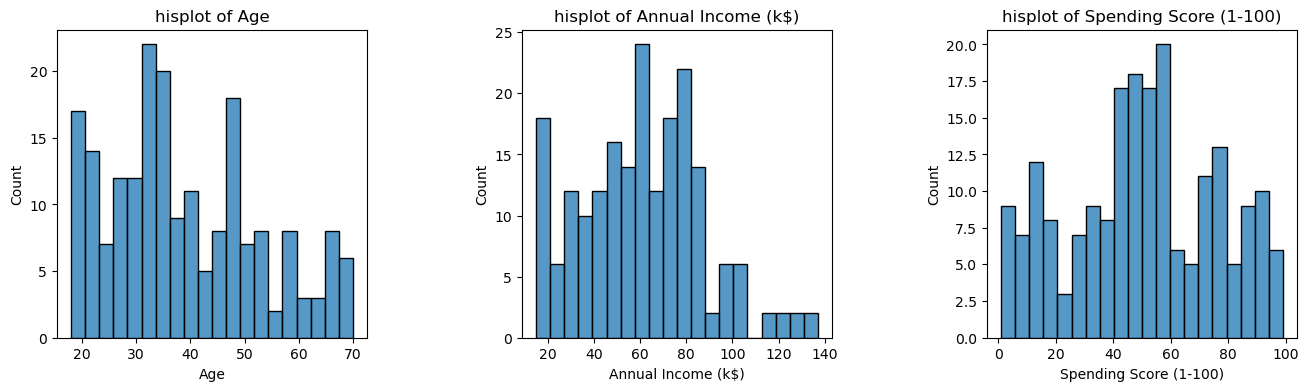

In [13]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.histplot(df[x] , bins=20)
    plt.title('hisplot of {}'.format(x))
plt.show()

In [14]:
x = df.iloc[:,[3,4]].values

In [15]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Building the Model

# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

In [16]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

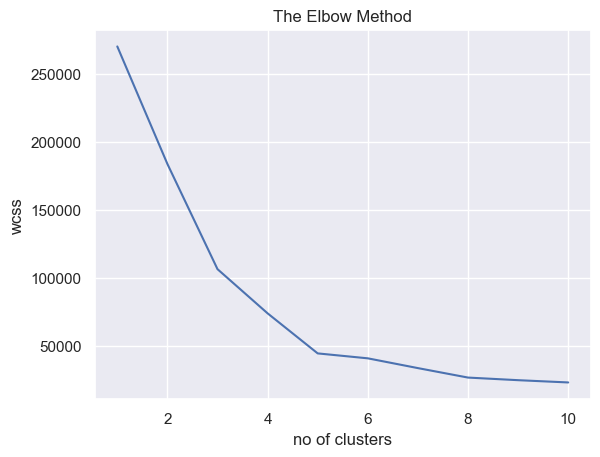

In [17]:
#Visualizing the ELBOW method to get the optimal value of K 
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# Clustering using K- means For visualizing

# Spending Score and Annual Income

In [18]:
km = KMeans(n_clusters=5).fit(x)

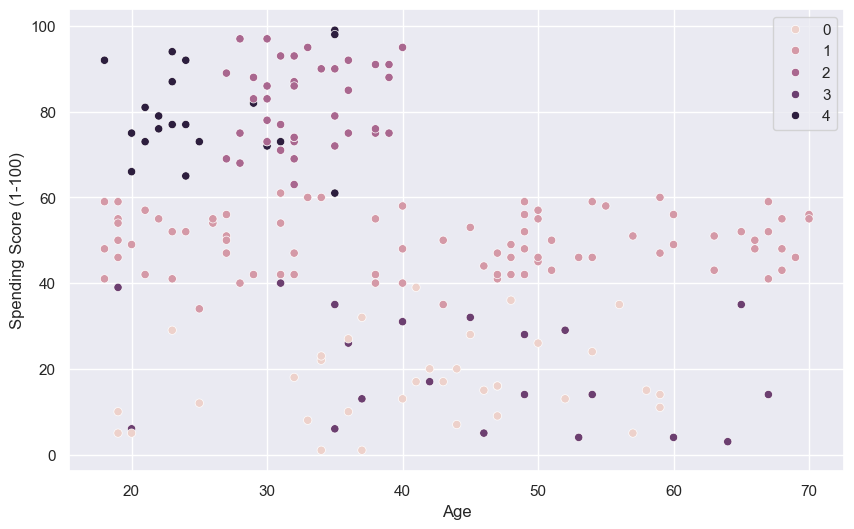

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = df,  hue=km.labels_)
plt.show()

# Age and Annual Income

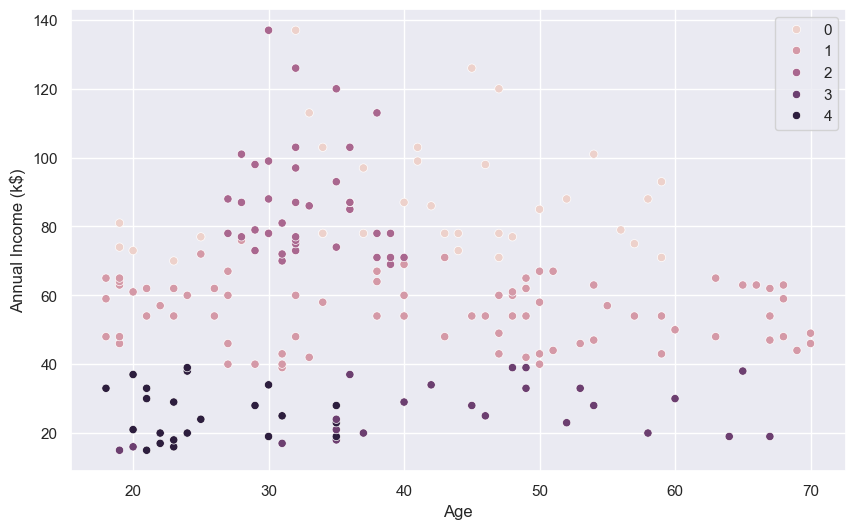

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = df,  hue=km.labels_)
plt.show()

# Annual Income and Spending Score

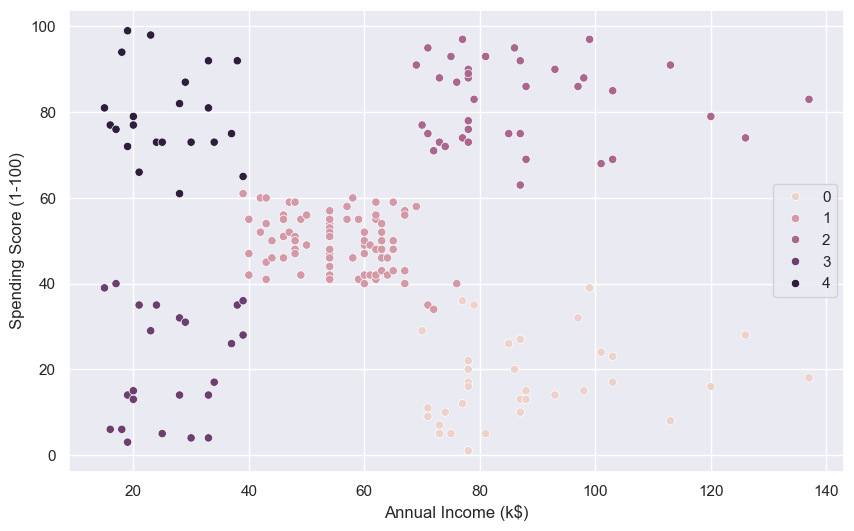

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df,  hue=km.labels_)
plt.show()

# Optimum Number of Cluster = 5

# Training the k-Means Clusterning Model

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)


In [23]:
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# Visualizing all the Clusters

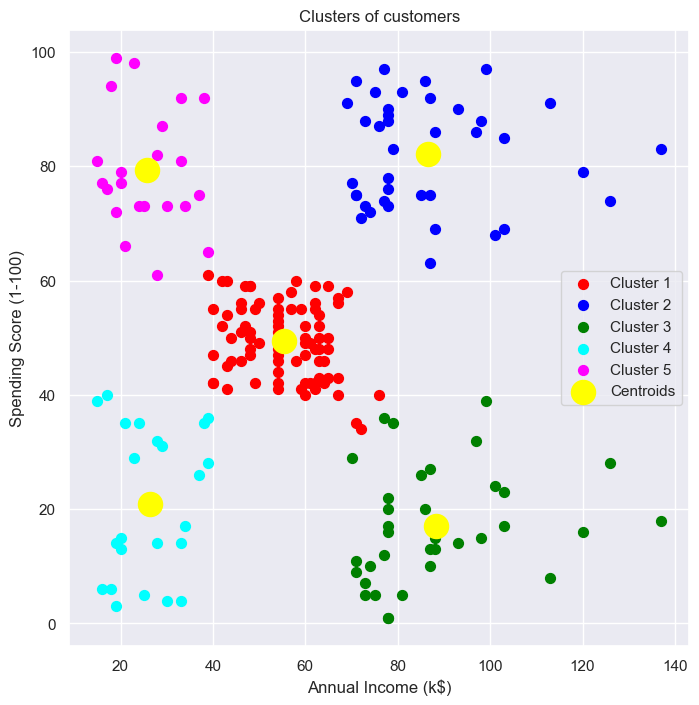

In [24]:
# plotting all the clusters and their Centroid

plt.figure(figsize=(8,8))

plt.scatter(x[Y == 0, 0], x[Y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[Y == 1, 0], x[Y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[Y == 2, 0], x[Y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[Y == 3, 0], x[Y == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[Y == 4, 0], x[Y == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')          
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()